In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
import matplotlib.patches as mpatches

In [2]:
CLN_DATA_PATH='../data/codon_df_clean.csv'

try:
    codon_df_clean = pd.read_csv(CLN_DATA_PATH, index_col=0)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("ERROR: The data file does not exist.")

Data loaded successfully.


## Introduction

In this notebook, Exploratory Data Analysis (EDA) will be the main goal to uncover valuable insights from our biological dataset. 

The primary objectives of this EDA are to examine the distribution and characteristics of the columns, ensuring the data is well-understood and appropriately prepared for further analysis. Analyze the variety and distribution of species names, DNA types, and kingdoms, gaining insights into the dataset. 

Investigate the codon frequency columns to understand the genetic patterns and variations among different species. This analysis can reveal trends, anomalies, and potential correlations within the genetic code.

Through visualization and statistical analysis, identify significant patterns, relationships, and outliers that can provide meaningful biological insights.

This EDA will serve as a crucial step towards deeper biological insights and more advanced computational biology analyses

## Basic EDA

Distribution of kingdoms

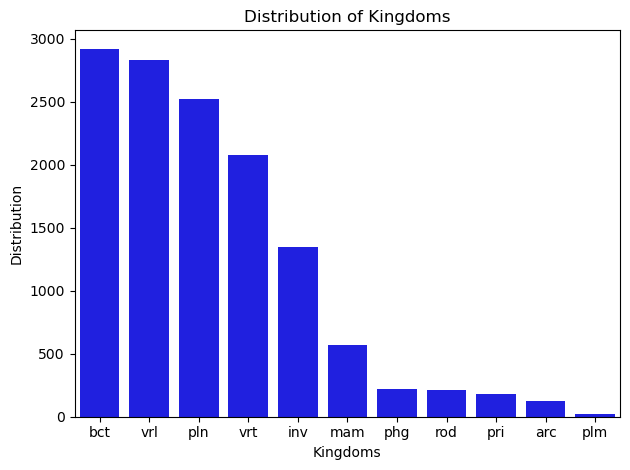

In [39]:
plt.figure()
sns.countplot(data=codon_df_clean, x='Kingdom', order=codon_df_clean['Kingdom'].value_counts().index, color='blue')
plt.title('Distribution of Kingdoms')
plt.xlabel('Kingdoms')
plt.ylabel('Distribution')
plt.tight_layout()
plt.show()

A general distribution of the total species per kingdom. 


Codon Frecuency Distribution 

<Figure size 640x480 with 0 Axes>

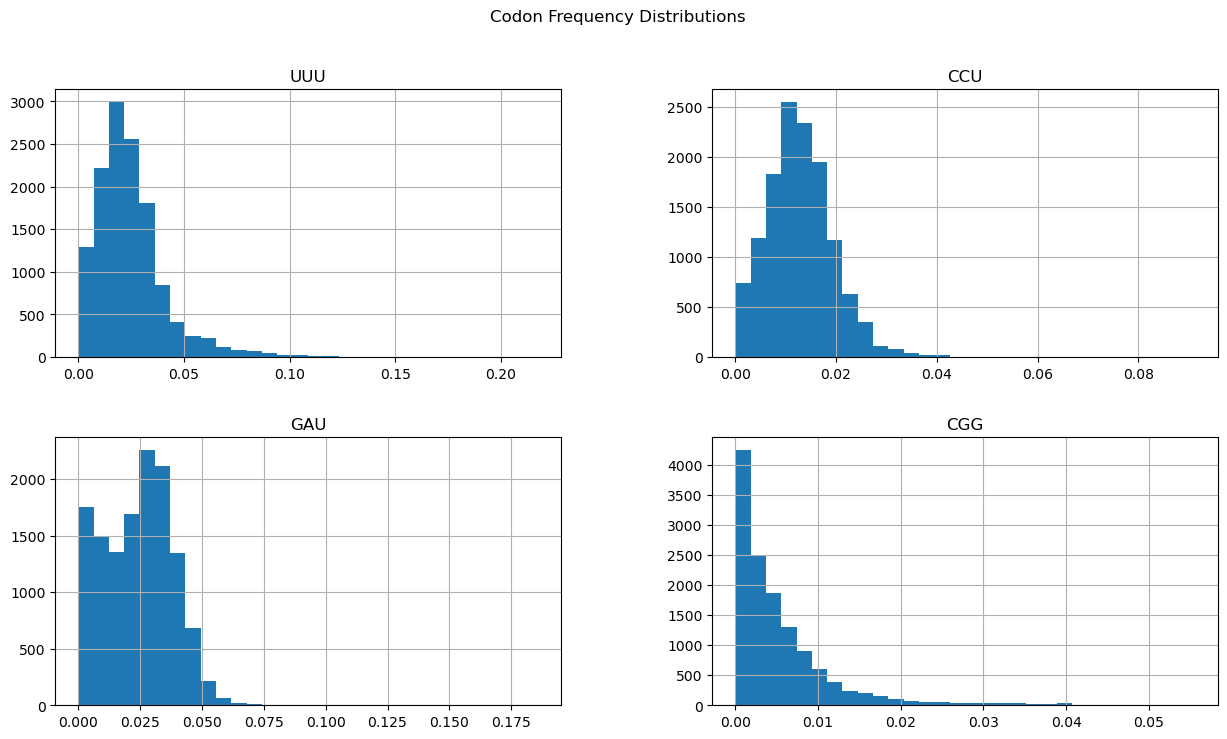

In [4]:
codons = ['UUU', 'CCU', 'GAU', 'CGG']
plt.figure()
codon_df_clean[codons].hist(bins=30, figsize=(15, 8))
plt.suptitle('Codon Frequency Distributions')
plt.show()

It seems that the distributions of codons is not normal

Frequency of DNA Types

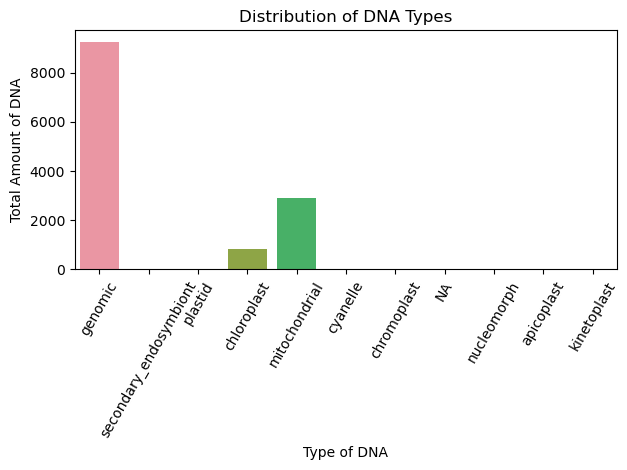

In [71]:
mapping_DNA = {0: 'genomic', 1:'mitochondrial', 2:'chloroplast', 3:'cyanelle', 4:'plastid', 
              5:'nucleomorph', 6:'secondary_endosymbiont', 7:'chromoplast', 8:'leucoplast', 
              9:'NA', 10:'proplastid', 11:'apicoplast', 12:'kinetoplast'}

codon_df_clean['DNAtype_mapped'] = codon_df_clean['DNAtype'].map(mapping_DNA).sort_values(ascending=False)

plt.figure()
sns.countplot(data=codon_df_clean, x='DNAtype_mapped')
plt.title('Distribution of DNA Types')
plt.xlabel('Type of DNA')
plt.ylabel('Total Amount of DNA')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

Mayority of the DNA comes from the nucleous(genomic), followed by mitochondrial and lastly chloroplasts 

No data for the other types of DNA

Average number of codons per Kingdom

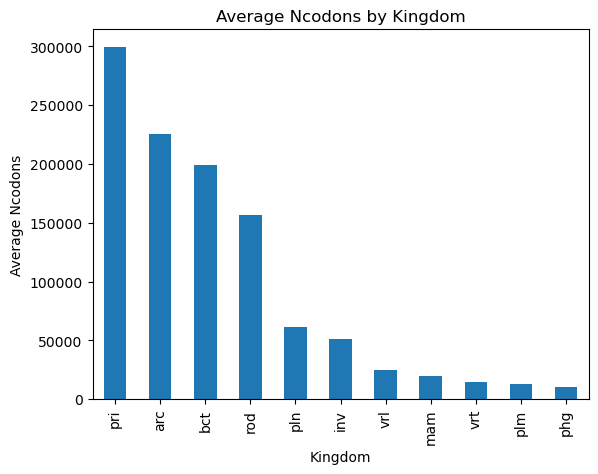

In [40]:
mean_ncodons_by_kingdom = codon_df_clean.groupby('Kingdom')['Ncodons'].mean().sort_values(ascending=False)
plt.figure()
mean_ncodons_by_kingdom.plot(kind='bar')
plt.title('Average Ncodons by Kingdom')
plt.xlabel('Kingdom')
plt.ylabel('Average Ncodons')
plt.show()

An idea of the typical total codon count in the genomes of species within each kingdom.

Larger genomes might have a higher total codon count.

Organisms with higher codon counts might have more genes or longer genes, reflecting more complex regulatory and metabolic processes.

Kingdom-wise Average Codon Frequencies

<Figure size 640x480 with 0 Axes>

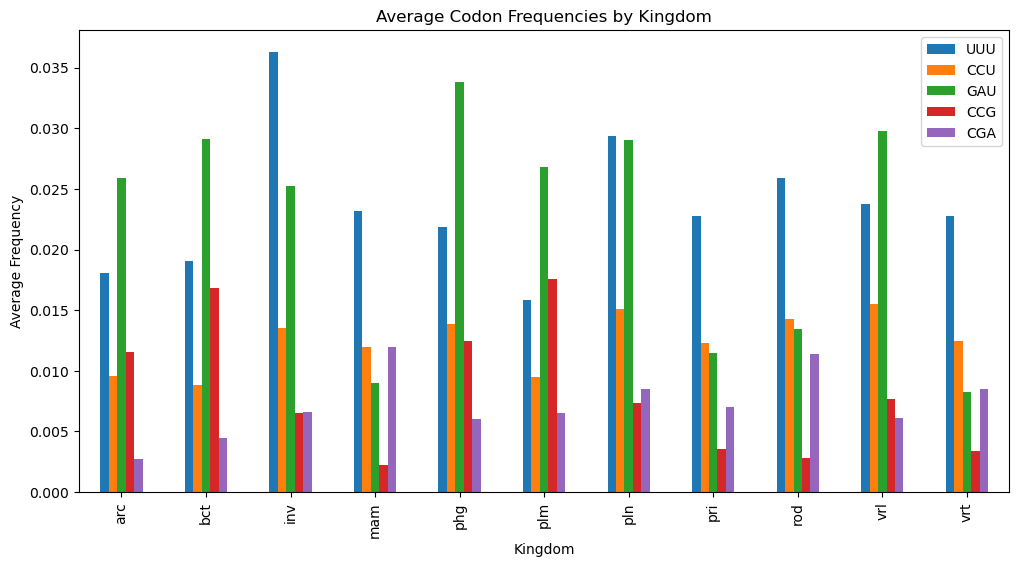

In [7]:
selected_codons = ['UUU', 'CCU', 'GAU', 'CCG', 'CGA']
kingdom_means = codon_df_clean.groupby('Kingdom')[selected_codons].mean()
plt.figure()
kingdom_means.plot(kind='bar', figsize=(12, 6))
plt.title('Average Codon Frequencies by Kingdom')
plt.xlabel('Kingdom')
plt.ylabel('Average Frequency')
plt.show()

The distribution of codons varies across different kingdoms.

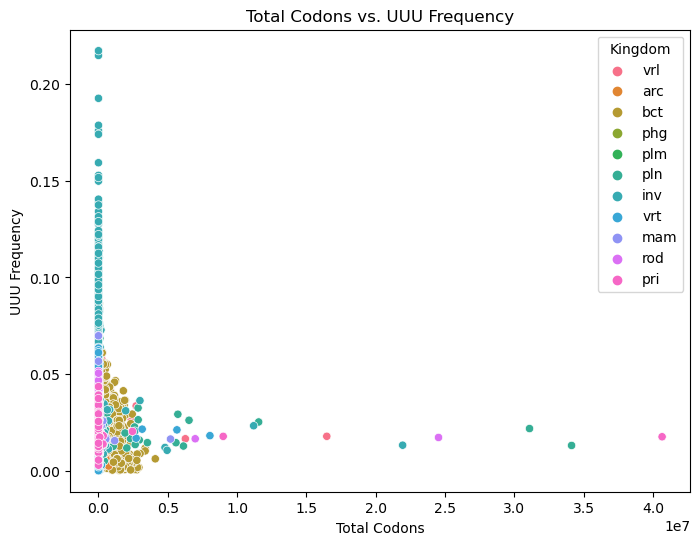

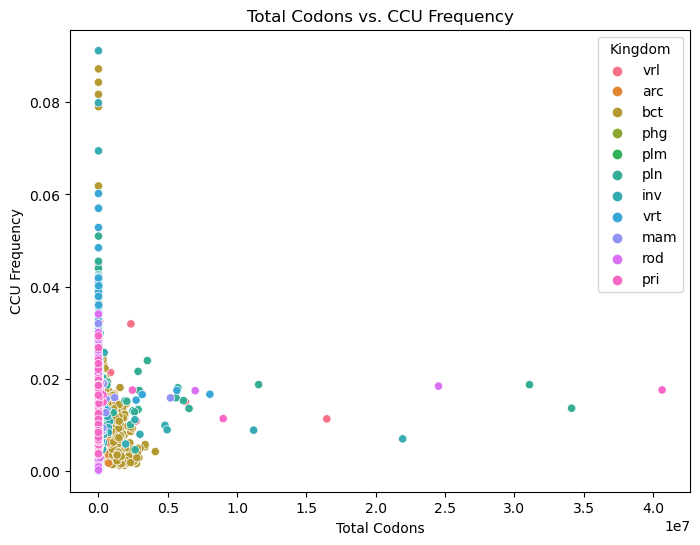

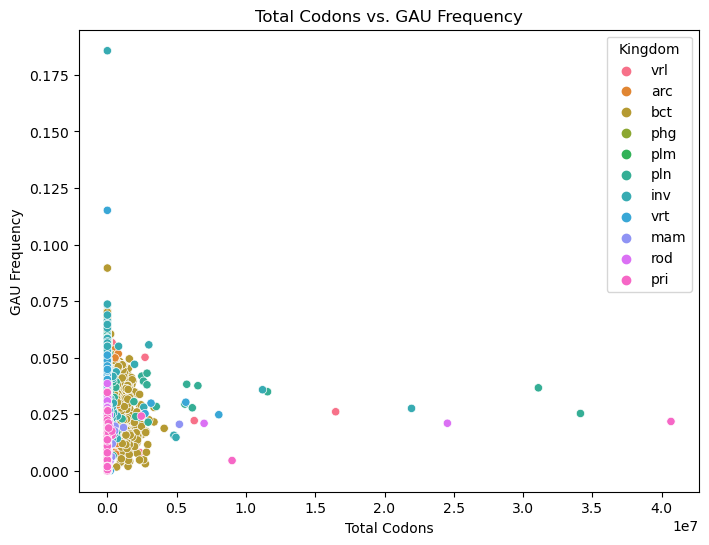

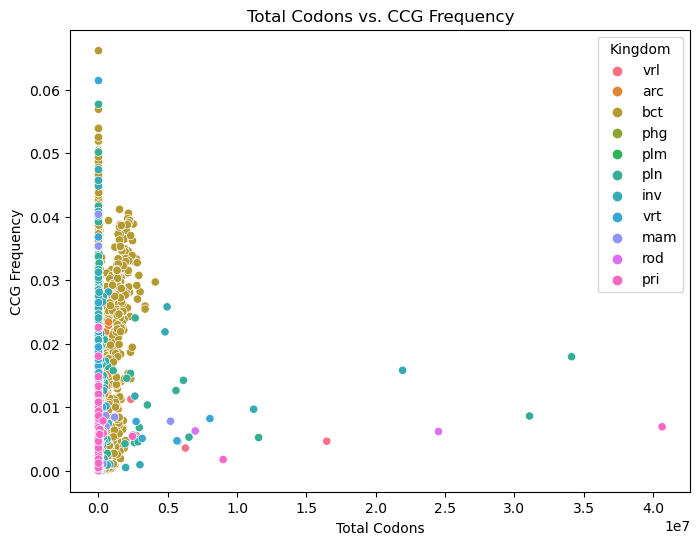

In [8]:
selected_codons = ['UUU', 'CCU', 'GAU', 'CCG']
for codon in selected_codons:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=codon_df_clean, x='Ncodons', y=codon, hue='Kingdom')
    plt.title(f'Total Codons vs. {codon} Frequency')
    plt.xlabel('Total Codons')
    plt.ylabel(f'{codon} Frequency')
    plt.show()

## Intermediate EDA

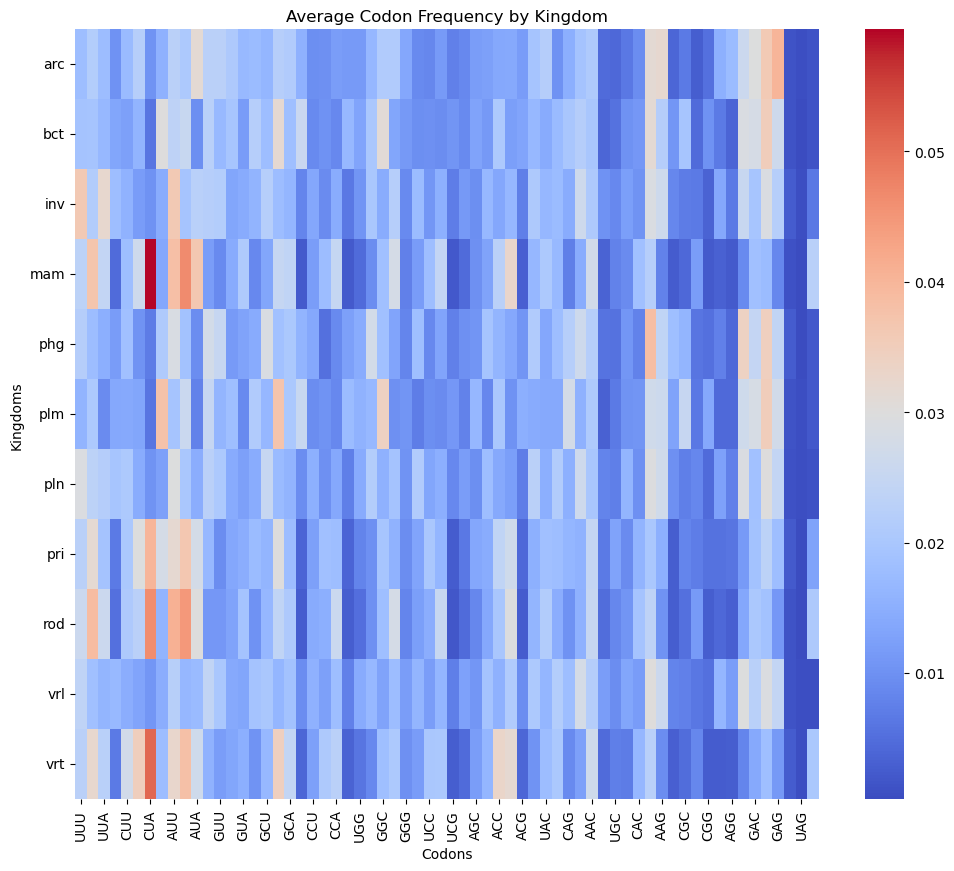

In [70]:
# Select the codon columns
codon_columns = codon_df_clean.columns[5:-1]

## Group by 'Kingdom' and calculate the mean for each codon column
kingdom_agg = codon_df_clean.groupby('Kingdom')[codon_columns].mean()

plt.figure(figsize=(12,10))
sns.heatmap(kingdom_agg, cmap='coolwarm')
plt.title('Average Codon Frequency by Kingdom')
plt.xlabel('Codons')
plt.ylabel('Kingdoms')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

From this heatmap is possible to apreciate the level of coliniarity between the codons and the Kingdoms. 

For example, the high correlation between the kingdom "Mammals" and the codon "CUA" in the heatmap suggests that mammals might exhibit a distinct pattern or preference in the usage of this particular codon compared to other kingdoms.



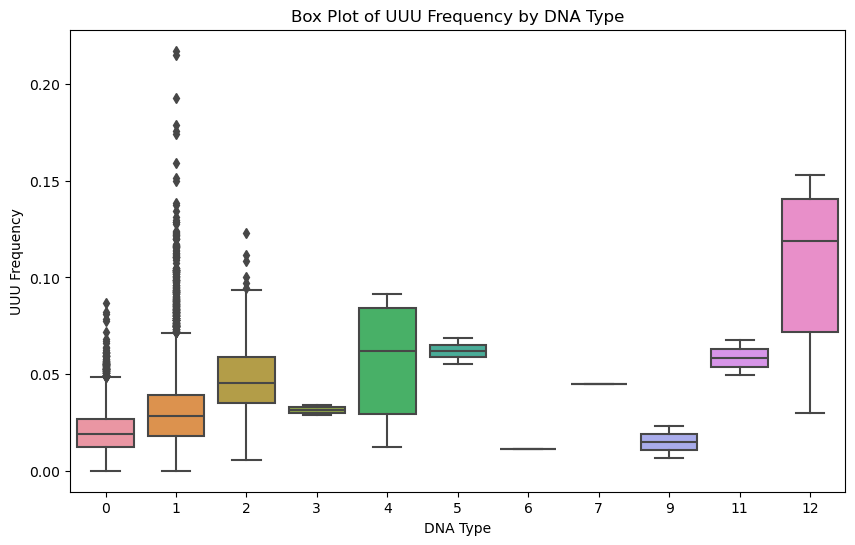

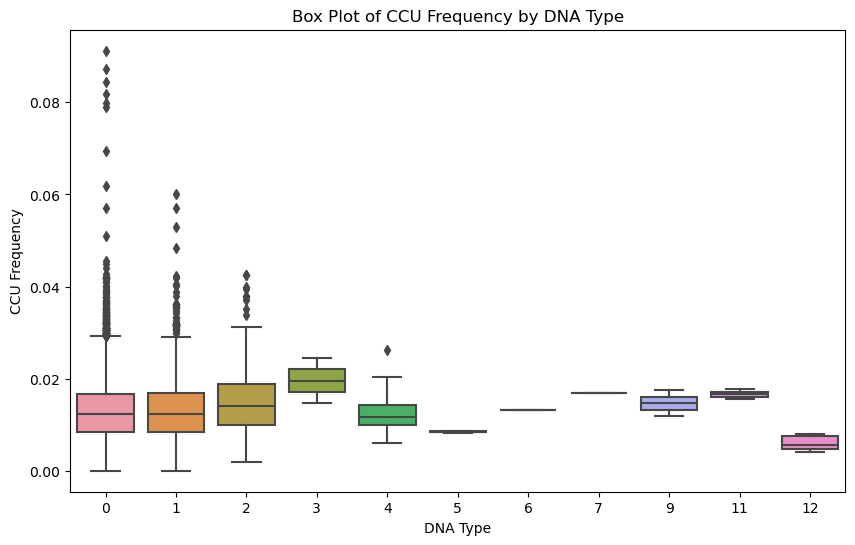

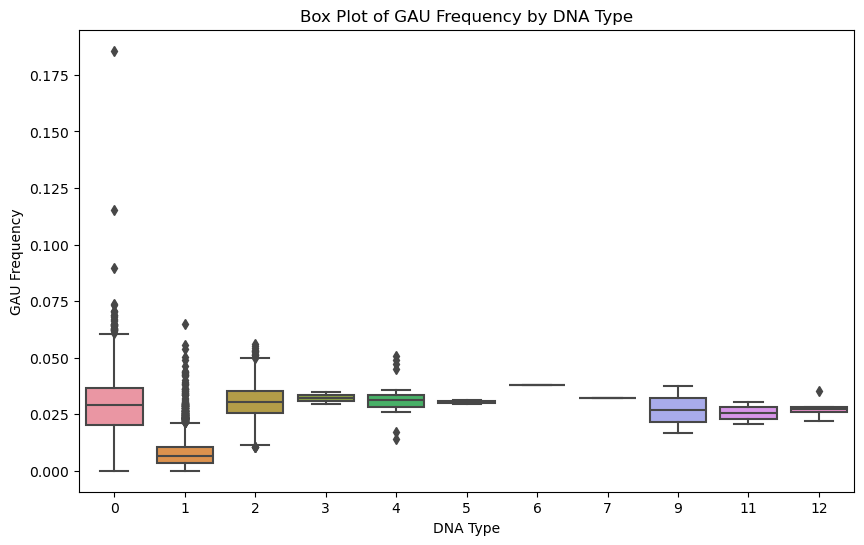

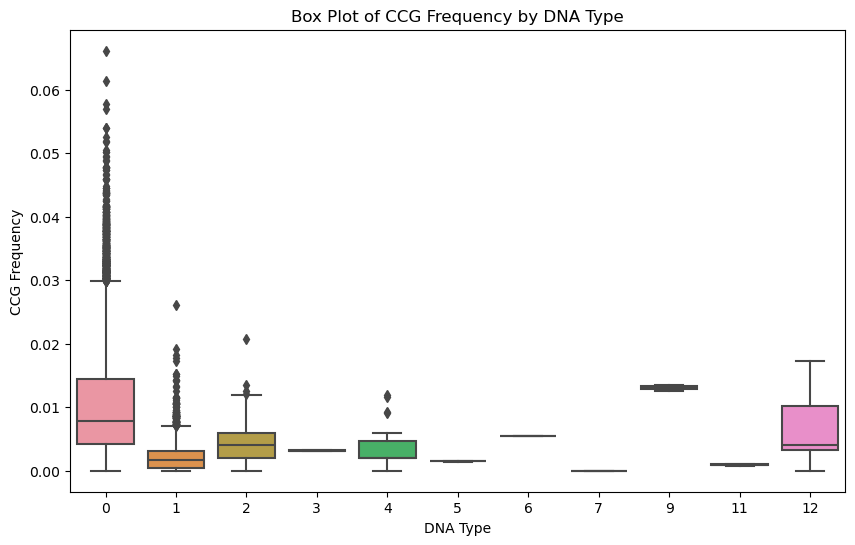

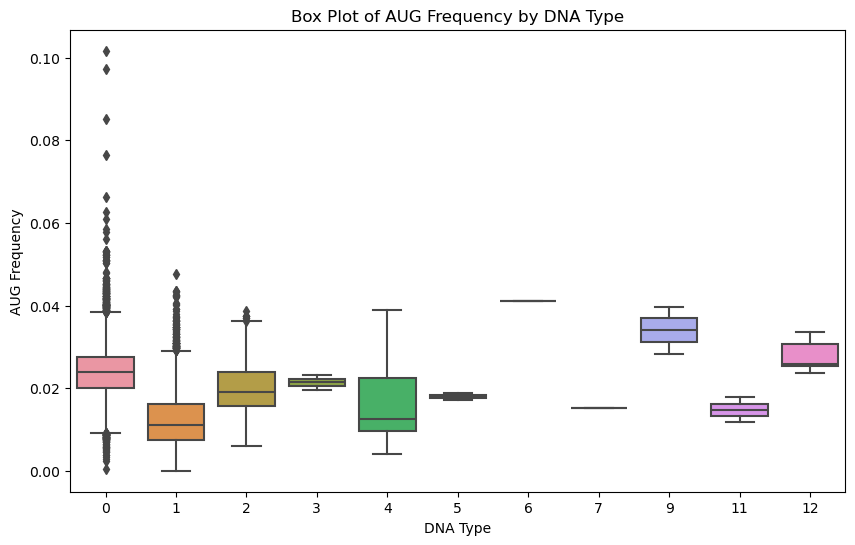

In [11]:
selected_codons = ['UUU', 'CCU', 'GAU', 'CCG', 'AUG']
for codon in selected_codons:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='DNAtype', y=codon, data=codon_df_clean)
    plt.title(f'Box Plot of {codon} Frequency by DNA Type')
    plt.xlabel('DNA Type')
    plt.ylabel(f'{codon} Frequency')
    plt.show()

Distribution of codons encoding valine, alanine and leucine by Kingdoms

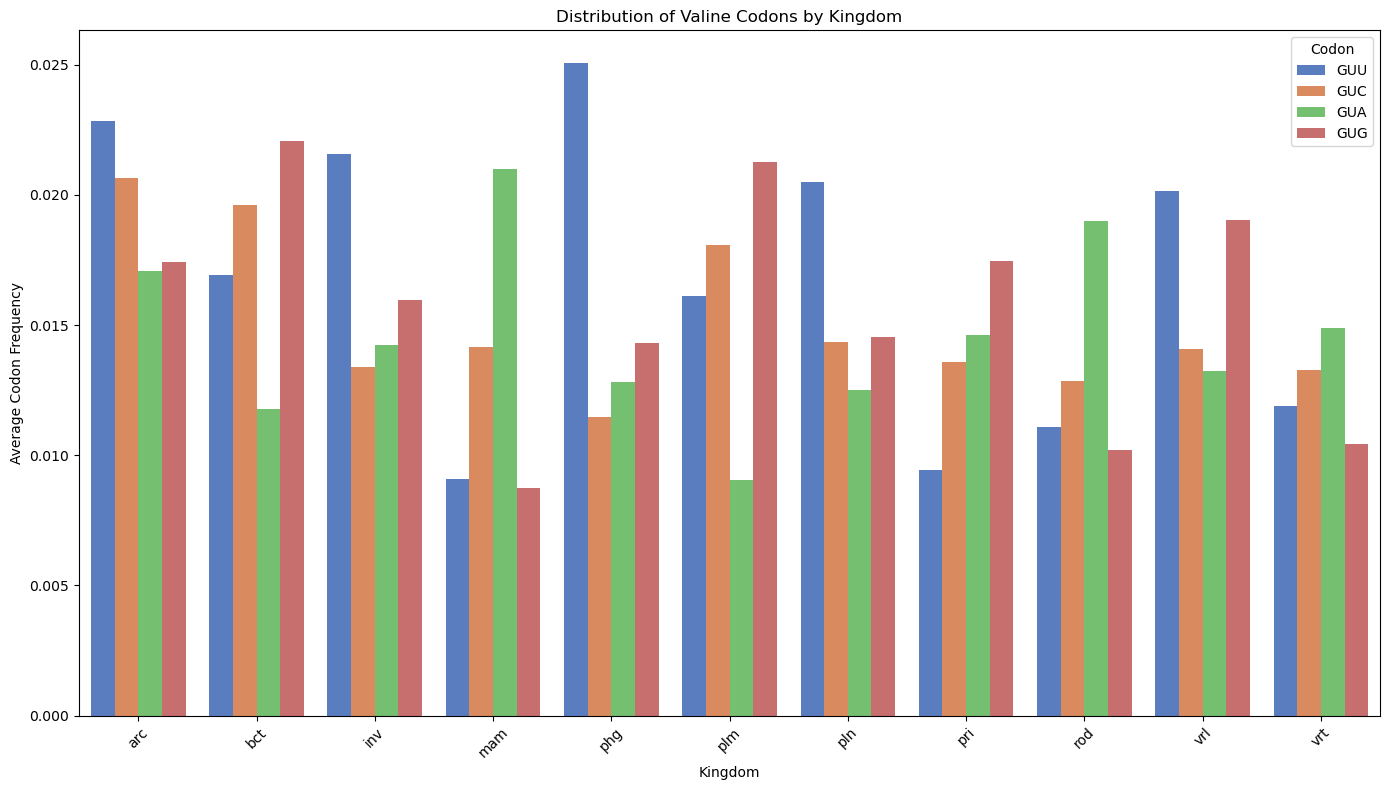

In [65]:
# Define the valine codons
valine =['GUU','GUC', 'GUA', 'GUG']

# Filter the dataframe to keep only the valine codons and the Kingdom column
valine_kingdom = codon_df_clean[['Kingdom'] + valine]

# Group by Kingdom and calculate the mean for each valine codon
kingdom_valine_agg = valine_kingdom.groupby('Kingdom').mean()

# Reset the index to convert the grouped object back to a DataFrame
kingdom_valine_agg = kingdom_valine_agg.reset_index()

# Melt the dataframe to long format for easier plotting
valine_melted = kingdom_valine_agg.melt(id_vars='Kingdom', var_name='Codon', value_name='Frequency')

plt.figure(figsize=(14, 8))
# Create a bar plot to show the distribution of valine codons across kingdoms
sns.barplot(data=valine_melted, x='Kingdom', y='Frequency', hue='Codon', palette='muted')
plt.title('Distribution of Valine Codons by Kingdom')
plt.xlabel('Kingdom')
plt.ylabel('Average Codon Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


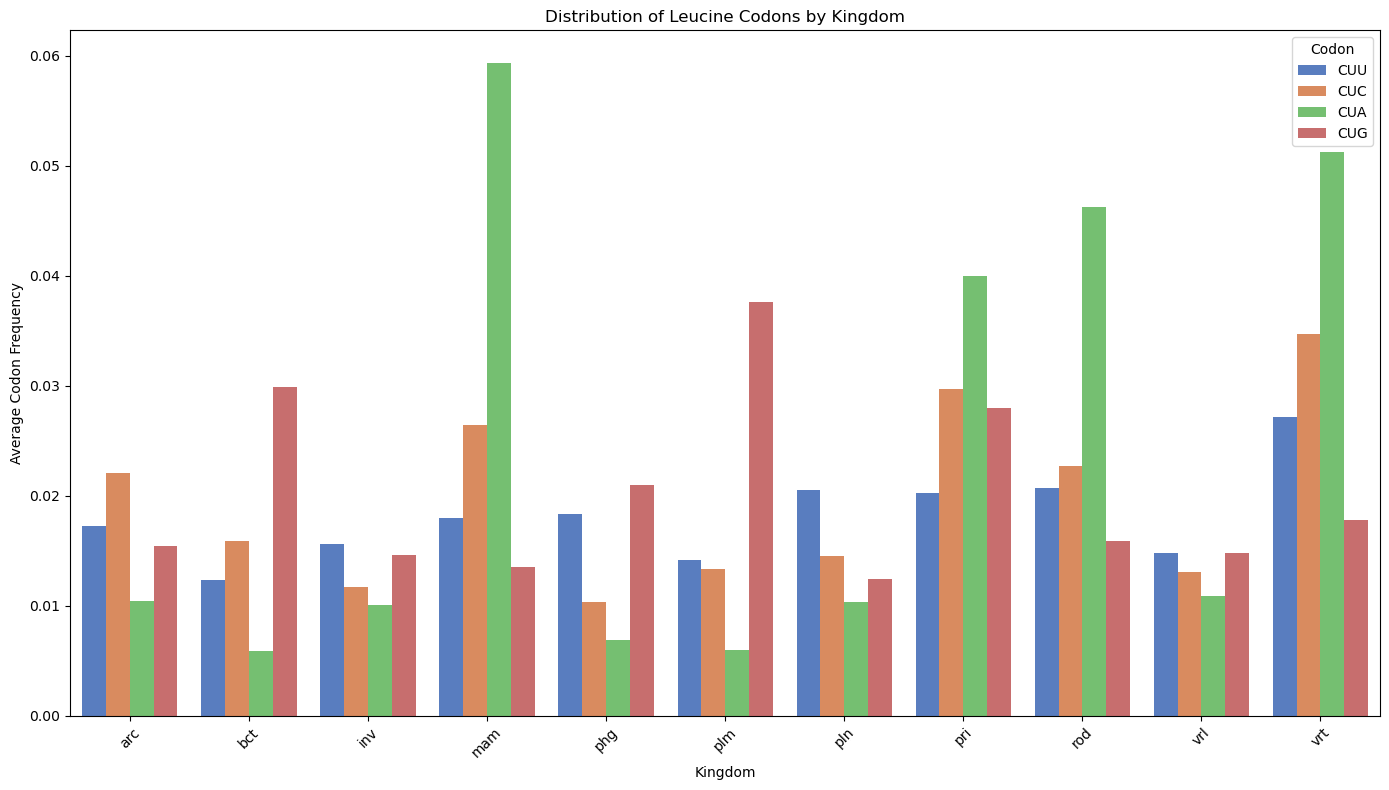

In [66]:
# Define the leucine codons
leucine =['CUU','CUC', 'CUA', 'CUG']

# Filter the dataframe to keep only the leucine codons and the Kingdom column
leucine_kingdom = codon_df_clean[['Kingdom'] + leucine]

# Group by Kingdom and calculate the mean for each leucine codon
kingdom_leucine_agg = leucine_kingdom.groupby('Kingdom').mean()

# Reset the index to convert the grouped object back to a DataFrame
kingdom_leucine_agg = kingdom_leucine_agg.reset_index()

# Melt the dataframe to long format for easier plotting
valine_melted = kingdom_leucine_agg.melt(id_vars='Kingdom', var_name='Codon', value_name='Frequency')

plt.figure(figsize=(14, 8))
# Create a bar plot to show the distribution of leucine codons across kingdoms
sns.barplot(data=valine_melted, x='Kingdom', y='Frequency', hue='Codon', palette='muted')
plt.title('Distribution of Leucine Codons by Kingdom')
plt.xlabel('Kingdom')
plt.ylabel('Average Codon Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

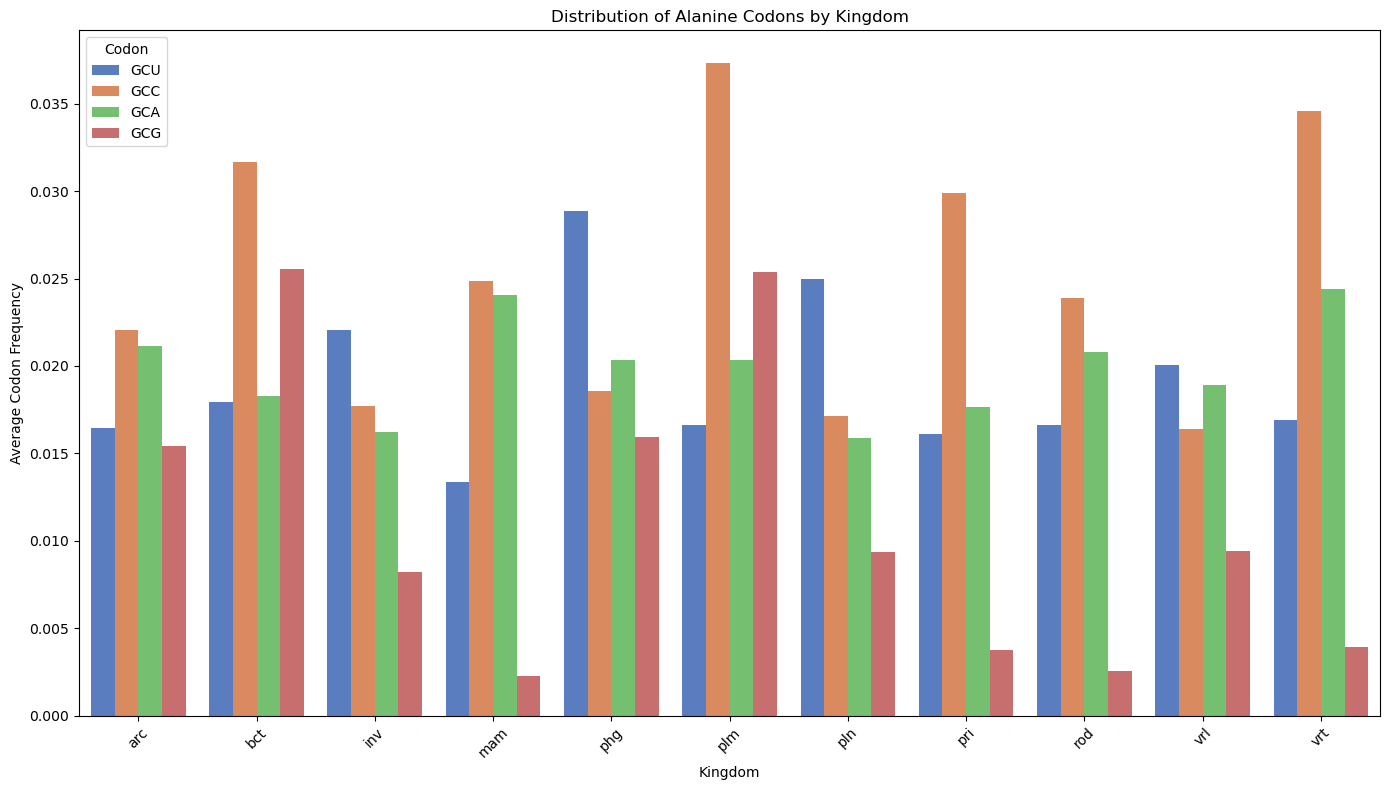

In [67]:
# Define the alanine codons
alanine =['GCU','GCC', 'GCA', 'GCG']

# Filter the dataframe to keep only the alanine codons and the Kingdom column
alanine_kingdom = codon_df_clean[['Kingdom'] + alanine]

# Group by Kingdom and calculate the mean for each alanine codon
kingdom_alanine_agg = alanine_kingdom.groupby('Kingdom').mean()

# Reset the index to convert the grouped object back to a DataFrame
kingdom_alanine_agg = kingdom_alanine_agg.reset_index()

# Melt the dataframe to long format for easier plotting
alanine_melted = kingdom_alanine_agg.melt(id_vars='Kingdom', var_name='Codon', value_name='Frequency')

plt.figure(figsize=(14, 8))
# Create a bar plot to show the distribution of valine codons across kingdoms
sns.barplot(data=alanine_melted, x='Kingdom', y='Frequency', hue='Codon', palette='muted')
plt.title('Distribution of Alanine Codons by Kingdom')
plt.xlabel('Kingdom')
plt.ylabel('Average Codon Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The specific usage of GUA codon for valine for example could be higher in mammals if the corresponding tRNA is more abundant or if the genome of mammals has evolved to prefer this codon for translational efficiency.

The variations in codon usage among different kingdoms are a result of complex evolutionary processes and adaptations that optimize gene expression and protein synthesis for each organism's unique biological and environmental context. These adaptations are reflected in the differing distributions of codon frequencies for amino acids like valine, leucine, and alanine across mammals, plants, bacteria, and other kingdoms

## Conclusion

After conducting exploratory data analysis (EDA) on the dataset, we gained valuable insights into the frequency distribution of codons across different kingdoms. However, due to the complexity of analyzing 64 codon columns across multiple kingdoms, EDA alone may not sufficiently reveal clear patterns that definitively link specific codon distributions to particular kingdoms. Therefore, employing machine learning techniques could be a promising approach to uncover relationships and potentially classify or predict the kingdom based on codon usage patterns.